In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import acquire
import prepare
import os
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

from math import sqrt
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

np.random.seed(123)

In [139]:
df = acquire.get_competition_data()

In [140]:
df = prepare.prepare_competition_data(df)

In [105]:
df['event_score'] = df.event_score.astype(float)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1856
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   event_final_place         1127 non-null   int64  
 1   last_name                 1127 non-null   object 
 2   short_best                1127 non-null   object 
 3   short_score               1127 non-null   float64
 4   short_place               1127 non-null   float64
 5   free_best                 1127 non-null   object 
 6   free_score                1127 non-null   float64
 7   free_place                1127 non-null   float64
 8   event_best                1127 non-null   object 
 9   event_score               1127 non-null   object 
 10  skater_name               1127 non-null   object 
 11  first_name                1127 non-null   object 
 12  short_combo_jump          1127 non-null   object 
 13  short_solo_jump           1127 non-null   object 
 14  short_ax

In [127]:
df.head()

,event_final_place,last_name,short_best,short_score,short_place,free_best,free_score,free_place,event_best,event_score,skater_name,first_name,short_combo_jump,short_solo_jump,short_axel_jump,short_elements_score,short_elements_rank,short_components_score,short_components_rank,short_overall,country,free_elements,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_overall,season,event,olympian,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,country_flag,triple_triple
0,1,Arakawa,skater_best,66.02,3.0,skater_best,125.32,1.0,PB,191.34,Shizuka Arakawa,Shizuka,3Lz+2T9,3F14,2A2,35.93,2,30.09,3,-0.0066.02,japan,"3Lz+2Lo , 3S+2T , 3F , 2A , 3Lz## , 2Lo## , 3S+2T+2Lo##",62.32,1,63.00,1,-0.00125.32,2006,olympics,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,🇯🇵,0
1,2,Cohen,skater_season_best,66.73,1.0,skater_season_best,116.63,2.0,SB,183.36,Sasha Cohen,Sasha,3Lz+2T13,3F7,2A20,35.33,3,31.40,1,-0.0066.73,usa,"3Lz , 3F , 3Lo , 3F+2T## , 3T+3S+SEQ## , 2A## , 3S##",55.22,3,62.41,2,-1.00116.63,2006,olympics,True,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,🇺🇸,0
2,3,Slutskaya,no_best,66.70,2.0,no_best,114.74,3.0,no_best,181.44,Irina Slutskaya,Irina,3Lz+2T8,3F3,2A1,36.21,1,30.49,2,-0.0066.70,russia,"3Lz , 3S+2T+2Lo , 3F , 2F+2T## , 3Lo## , 3T+2T## , 2A##",53.87,5,61.87,3,-1.00114.74,2006,olympics,True,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,🇷🇺,0
3,4,Suguri,skater_season_best,61.75,4.0,skater_season_best,113.48,4.0,SB,175.23,Fumie Suguri,Fumie,3Lz+2T6,3F3,2A11,32.61,6,29.14,4,-0.0061.75,japan,"3Lz+2T , 3F , 3S , 3Lz## , 2F+2T## , 3T## , 2A+2T##",54.23,4,59.25,4,-0.00113.48,2006,olympics,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,🇯🇵,0
4,5,Rochette,no_best,55.85,9.0,skater_season_best,111.42,5.0,SB,167.27,Joannie Rochette,Joannie,3Lz+2T4,3F22,2A13,28.87,11,26.98,6,-0.0055.85,canada,"3F , 3Lz+2T , 3Lo , 3S , 2Lz## , 3T+2T+2Lo## , 2A+3S+SEQ##",55.29,2,56.13,5,-0.00111.42,2006,olympics,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,🇨🇦,0


In [142]:
df['triple_triple'] = df.free_elements.str.contains("\+3").sum()

In [144]:
df['triple_triple'] = df.apply(lambda x: x.str.contains("3S+3") | x.str.contains("3T+3") | x.str.contains("3Lo+3") | x.str.contains("3F+3") | x.str.contains("3Lz+3"), axis=1).sum(axis=1)

In [146]:
df['triple_triple'].value_counts()

0    985
1    136
2      6
Name: triple_triple, dtype: int64

In [148]:
df['quad'] = df.apply(lambda x: x.str.contains("4S") | x.str.contains("4T") | x.str.contains("4Lo") | x.str.contains("4F") | x.str.contains("4Lz"), axis=1).sum(axis=1)

In [149]:
df['quad'].value_counts()

0    1109
1      18
Name: quad, dtype: int64

In [150]:
df['triple_axel'] = df.apply(lambda x: x.str.contains("3A"), axis=1).sum(axis=1)

In [151]:
df.triple_axel.value_counts()

0.0    1067
1.0      31
2.0      29
Name: triple_axel, dtype: int64

In [9]:
df = df.drop(columns=['last_name', 'country_flag', 'short_best', 'olympian',  'free_place', 'free_best', 'event_best', 'first_name', 'short_combo_jump', 'short_solo_jump', 'short_axel_jump', 'free_elements'])

In [10]:
df['season'] = df.season.astype('object')

In [11]:
# df2006 = pd.DataFrame(df[(df.season <= 2006)].where(df.event != 'olympics'))
# o2006 = pd.DataFrame(df[df.season == 2006].where(df.event == 'olympics'))
# df2010 = pd.DataFrame(df[(df.season <= 2010)].where(df.event != 'olympics'))
# o2010 = pd.DataFrame(df[df.season == 2010].where(df.event == 'olympics'))
# df2014 = pd.DataFrame(df[(df.season <= 2014)].where(df.event != 'olympics'))
# o2014 = pd.DataFrame(df[df.season == 2014].where(df.event == 'olympics'))
# df2018 = pd.DataFrame(df[(df.season <= 2018)].where(df.event != 'olympics'))
# o2018 = pd.DataFrame(df[df.season == 2018].where(df.event == 'olympics'))
# df2022 = pd.DataFrame(df[(df.season <= 2022)].where(df.event != 'olympics'))
# o2022 = pd.DataFrame(df[df.season == 2022].where(df.event == 'olympics'))

In [12]:
df2006 = pd.DataFrame(df[(df.season <= 2006)].where(df.event != 'olympics'))
o2006 = pd.DataFrame(df[df.season == 2006].where(df.event == 'olympics'))
df2010 = pd.DataFrame(df[(df.season <= 2010) & (df.season > 2006)].where(df.event != 'olympics'))
o2010 = pd.DataFrame(df[df.season == 2010].where(df.event == 'olympics'))
df2014 = pd.DataFrame(df[(df.season <= 2014) & (df.season > 2010)].where(df.event != 'olympics'))
o2014 = pd.DataFrame(df[df.season == 2014].where(df.event == 'olympics'))
df2018 = pd.DataFrame(df[(df.season <= 2018) & (df.season > 2014)].where(df.event != 'olympics'))
o2018 = pd.DataFrame(df[df.season == 2018].where(df.event == 'olympics'))
df2022 = pd.DataFrame(df[(df.season <= 2022) & (df.season > 2018)].where(df.event != 'olympics'))
o2022 = pd.DataFrame(df[df.season == 2022].where(df.event == 'olympics'))

In [13]:
df2006 = df2006.dropna()
o2006 = o2006.dropna()
df2010 = df2010.dropna()
o2010 = o2010.dropna()
df2014 = df2014.dropna()
o2014 = o2014.dropna()
df2018 = df2018.dropna()
o2018 = o2018.dropna()
df2022 = df2022.dropna()
o2022 = o2022.dropna()

In [14]:
o2006 = o2006[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2010 = o2010[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2014 = o2014[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2018 = o2018[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2022 = o2022[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]

In [15]:
o2006 = o2006.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2010 = o2010.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2014 = o2014.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2018 = o2018.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2022 = o2022.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})

In [16]:
df2006 = df2006.groupby(df2006.skater_name).mean()
df2010 = df2010.groupby(df2010.skater_name).mean()
df2014 = df2014.groupby(df2014.skater_name).mean()
df2018 = df2018.groupby(df2018.skater_name).mean()
df2022 = df2022.groupby(df2022.skater_name).mean()

In [17]:
# df2006.columns = df2006.columns.get_level_values(0) + '_' +  df2006.columns.get_level_values(1)
# df2010.columns = df2010.columns.get_level_values(0) + '_' +  df2010.columns.get_level_values(1)
# df2014.columns = df2014.columns.get_level_values(0) + '_' +  df2014.columns.get_level_values(1)
# df2018.columns = df2018.columns.get_level_values(0) + '_' +  df2018.columns.get_level_values(1)
# df2022.columns = df2022.columns.get_level_values(0) + '_' +  df2022.columns.get_level_values(1)

In [18]:
df06 = df2006.merge(o2006, on='skater_name')
df10 = df2010.merge(o2010, on='skater_name')
df14 = df2014.merge(o2014, on='skater_name')
df18 = df2018.merge(o2018, on='skater_name')
df22 = df2022.merge(o2022, on='skater_name')

In [19]:
df = pd.concat([df06, df10, df14, df18, df22], axis=0)

In [20]:
df['season'] = df.season.astype(int)

In [21]:
#df = pd.concat([o2006, o2010, o2014, o2018, o2022], axis=0)

In [22]:
df = df.drop(columns=['event_final_place'])

In [23]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [24]:
train

,skater_name,short_score,short_place,free_score,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score,season
9,Kanako Murakami,57.075833,4.416667,109.609167,166.685000,29.343333,4.916667,27.815833,4.666667,53.643333,4.333333,56.299167,4.583333,0.333333,0.083333,0.416667,1.750000,0.333333,1.000000,0.000000,0.000000,0.000000,0.083333,3.583333,0.750000,0.166667,0.0,0.000000,japan,12.0,55.60,26.72,28.88,56.96,58.42,115.38,170.98,2014
2,Anastasia Gimazetdinova,44.886250,11.125000,72.533750,119.795000,24.707500,10.375000,20.428750,13.125000,33.286250,15.250000,39.622500,13.625000,0.375000,0.250000,0.625000,0.250000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,1.250000,1.000000,0.000000,0.0,0.000000,uzbekistan,23.0,49.02,27.94,21.08,41.47,42.16,82.63,131.65,2010
15,Yuna Kim,65.393333,3.000000,135.806667,201.200000,33.260000,6.000000,32.133333,1.666667,67.633333,2.000000,68.506667,1.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.000000,0.0,0.000000,south_korea,2.0,74.92,39.03,35.89,69.69,74.50,144.19,219.11,2014
10,Kaori Sakamoto,72.156667,3.111111,141.921111,214.077778,38.000000,4.000000,34.267778,2.444444,72.274444,3.444444,69.757778,2.555556,0.111111,0.111111,0.222222,0.111111,0.000000,0.444444,0.444444,0.111111,0.000000,0.000000,1.333333,0.222222,0.333333,0.0,0.000000,japan,3.0,79.84,43.22,36.62,78.90,74.39,153.29,233.13,2022
19,Xiangning Li,56.576000,12.700000,110.394000,166.970000,30.591000,12.400000,26.943000,14.900000,56.192000,9.800000,53.556000,13.400000,0.400000,0.000000,0.400000,1.600000,0.400000,0.200000,0.400000,0.000000,0.000000,0.000000,3.000000,0.800000,0.000000,0.0,0.000000,china,22.0,52.46,27.27,26.19,50.56,51.41,101.97,154.43,2018
0,Adelina Sotnikova,60.201250,3.375000,111.102500,171.303750,31.597500,3.875000,28.853750,4.000000,53.170000,5.250000,59.057500,3.500000,1.125000,0.250000,1.375000,0.500000,0.250000,1.125000,0.000000,0.000000,0.000000,0.125000,3.375000,1.625000,0.125000,0.0,0.000000,russia,1.0,74.64,39.09,35.55,75.54,74.41,149.95,224.59,2014
19,Wakaba Higuchi,67.418571,4.428571,126.694286,194.112857,35.132857,5.857143,32.571429,4.142857,61.685714,6.000000,65.294286,4.142857,0.285714,0.285714,0.571429,0.571429,0.285714,0.571429,1.000000,0.428571,0.000000,0.142857,3.571429,0.857143,0.000000,0.0,0.571429,japan,5.0,73.51,39.53,33.98,72.67,69.26,140.93,214.44,2022
15,Mariah Bell,66.750000,6.111111,133.706667,200.456667,34.778889,6.777778,32.304444,6.111111,67.640000,5.111111,66.288889,5.222222,0.222222,0.333333,0.555556,0.444444,0.333333,0.000000,0.888889,0.000000,0.000000,0.111111,2.333333,0.888889,0.111111,0.0,0.000000,usa,10.0,65.38,33.43,32.95,68.25,68.67,136.92,202.30,2022
9,Joannie Rochette,53.282500,4.500000,99.092500,155.331250,27.857500,5.000000,25.550000,5.000000,47.668750,5.375000,51.798750,4.750000,0.375000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.875000,0.875000,0.250000,0.0,0.000000,canada,5.0,55.85,28.87,26.98,55.29,56.13,111.42,167.27,2006
12,Maé-Bérénice Méité,52.424000,7.500000,100.148000,152.572000,29.192000,5.000000,23.332000,10.100000,53.327000,5.800000,47.421000,9.800000,0.600000,0.100000,0.700000,0.300000,0.100000,0.100000,0.000000,0.000000,0.100000,0.000000,1.300000,0.900000,0.500000,0.0,0.000000,france,10.0,58.63,30.83,27.80,60.86,56.04,115.90,174.53,2014


### Distributions of features
- where it makes sense (ie. do not need distribution of skater placement as there will clearly be a place assigned to each skater based on results)

<AxesSubplot:title={'center':'Feature Correlation (contiuous variables) to event score'}>

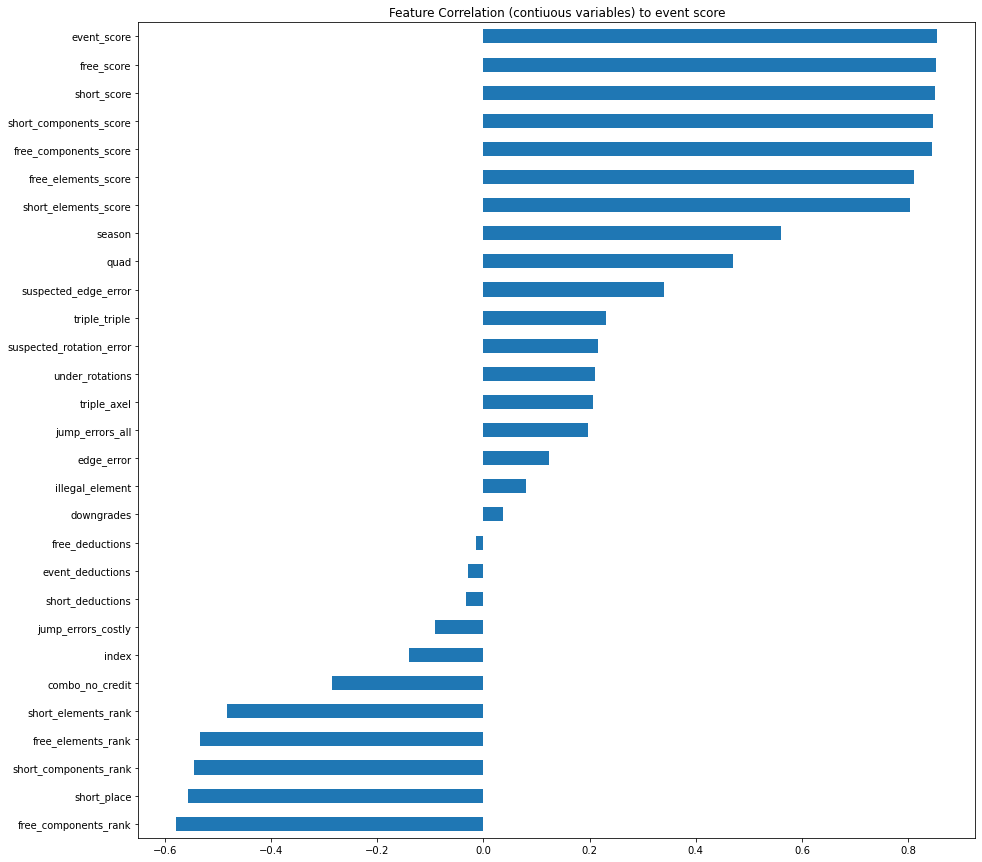

In [90]:
plt.figure(figsize=(15, 15))
# sets the size of the graph
plt.title("Feature Correlation (contiuous variables) to event score")
corr_chart = train.drop(['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'oly_event_score'], axis=1).corrwith(train['oly_event_score']).sort_values().plot.barh()
corr_chart

In [26]:
X_train = train.drop(columns=['oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score'])

In [27]:
#df = df.reset_index()

In [28]:
#df.season.value_counts()

In [29]:
#olympic_results = df[['skater_name', 'oly_event_final_place', 'oly_short_score', 'oly_short_elements_score', 'oly_short_components_score', 
                      #'oly_free_elements_score', 'oly_free_components_score', 'oly_free_score', 'season']]

In [30]:
#df['season'] = df['season'].astype(int)

In [31]:
#df[(df['season'] == 2014)].sort_values(by='oly_free_components_score', ascending=False)

In [32]:
def map_score(country):
  if country == 'usa':
    return "usa"
  elif (country == 'canada') | (country == 'russia') | (country == 'japan') | (country == 'south_korea') | (country == 'italy'):
    return 'top'
  else:
    return 'other'

train["top"] = train["country"].apply(lambda country: map_score(country))

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/3573017000.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/3573017000.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details 

<Figure size 432x288 with 0 Axes>

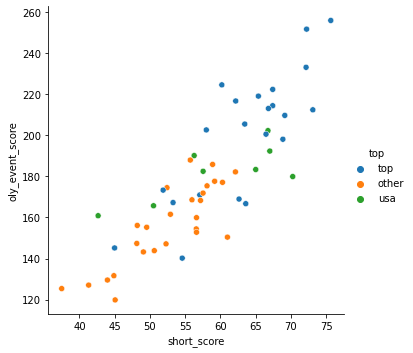

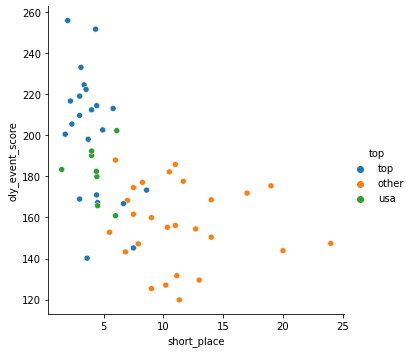

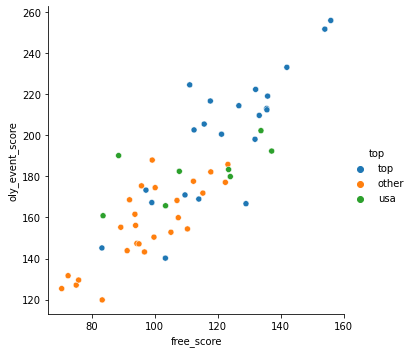

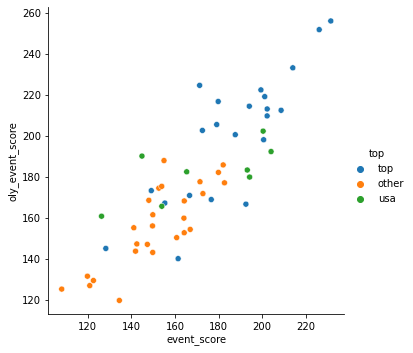

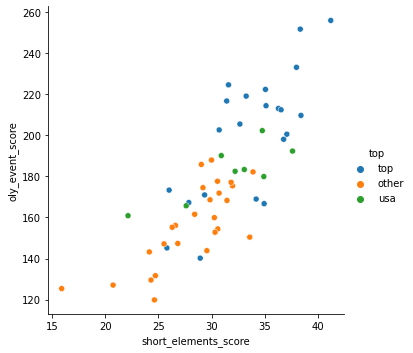

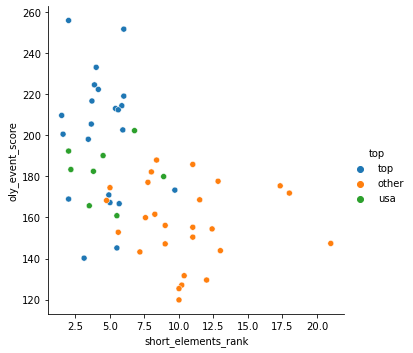

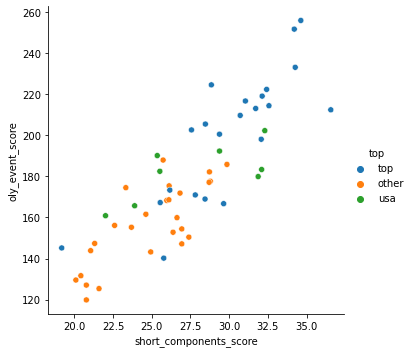

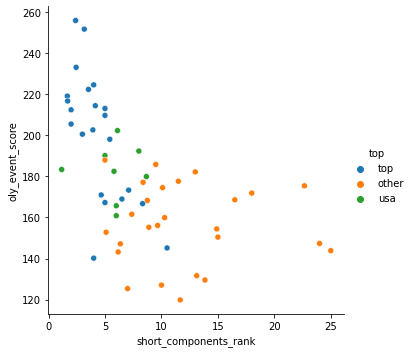

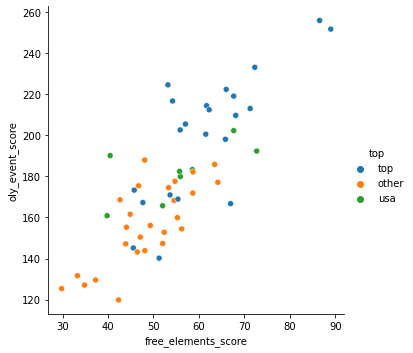

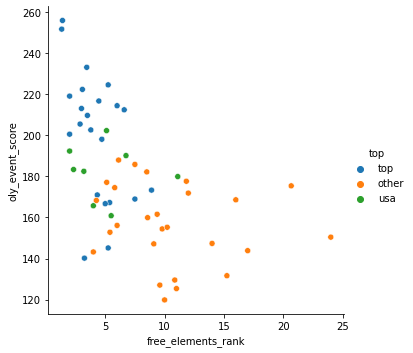

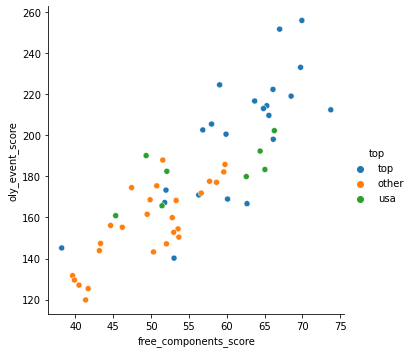

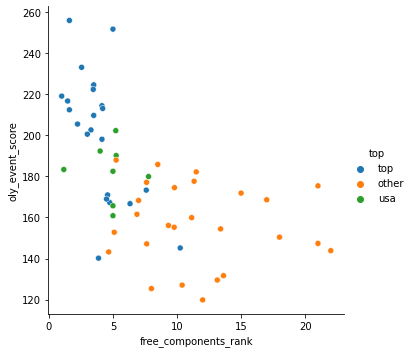

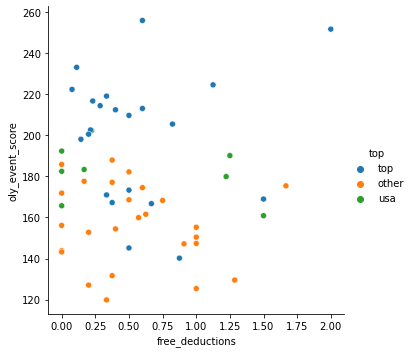

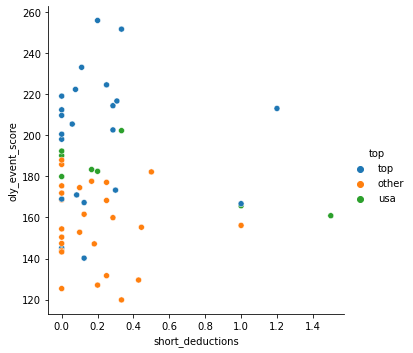

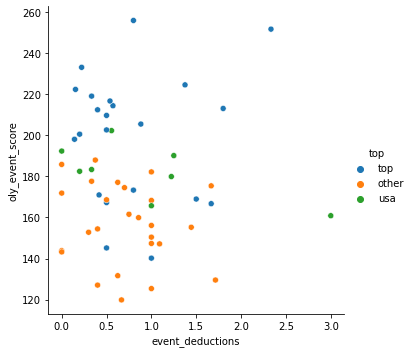

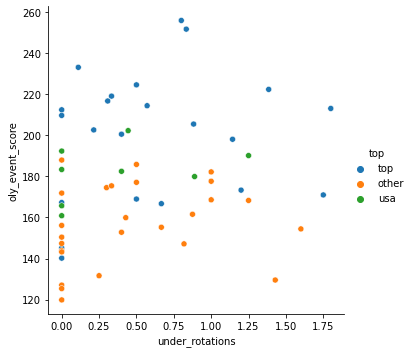

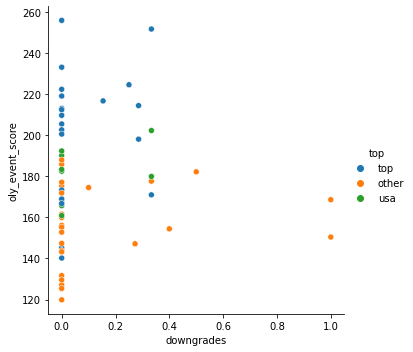

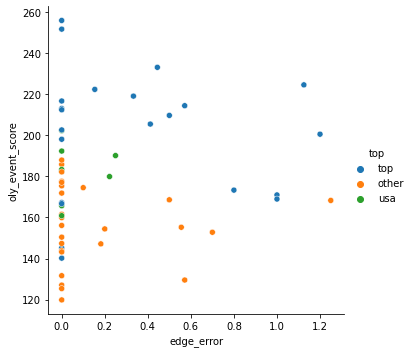

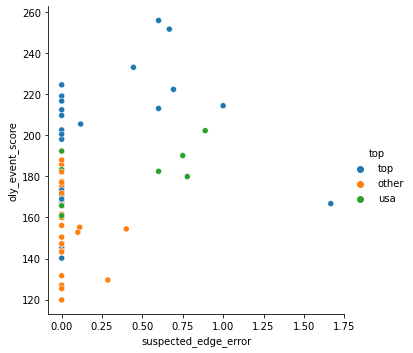

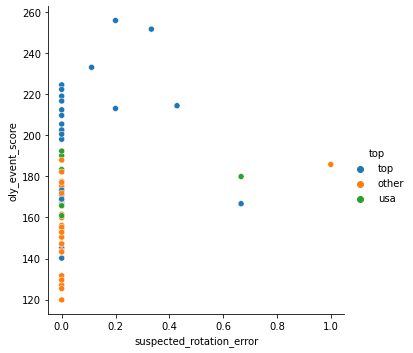

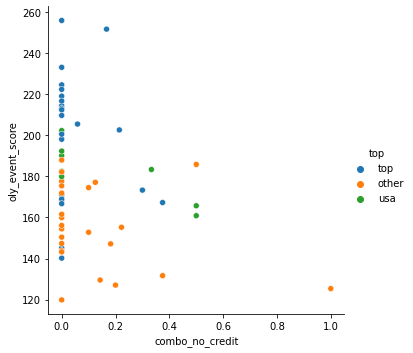

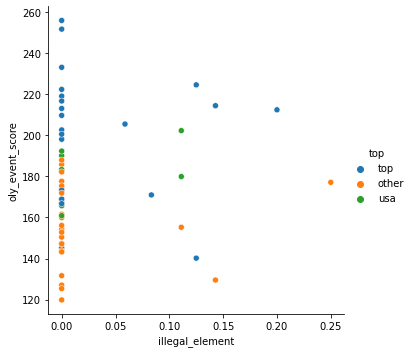

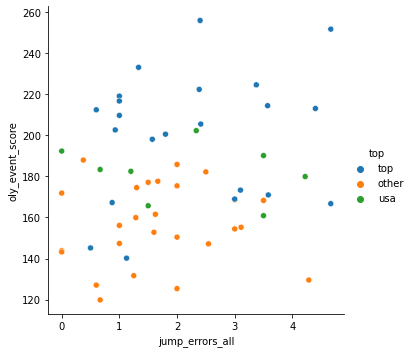

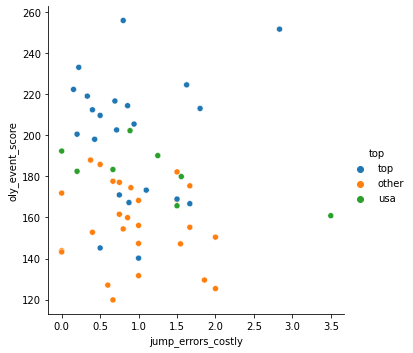

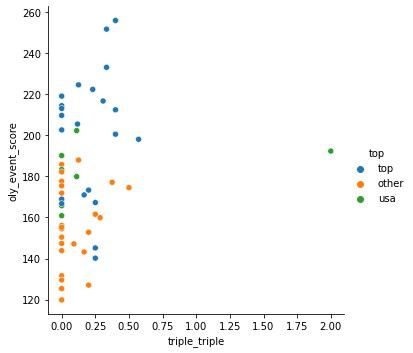

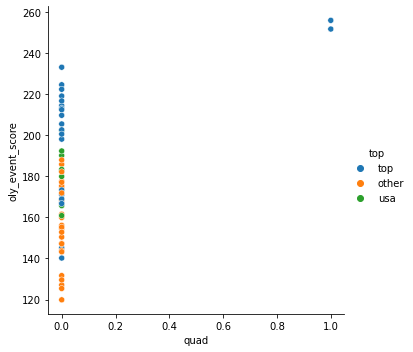

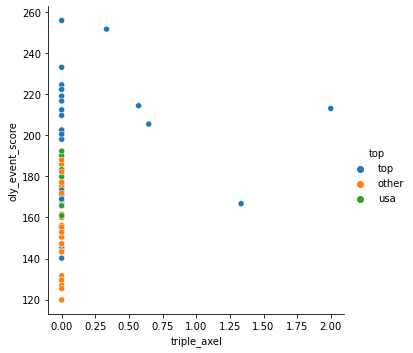

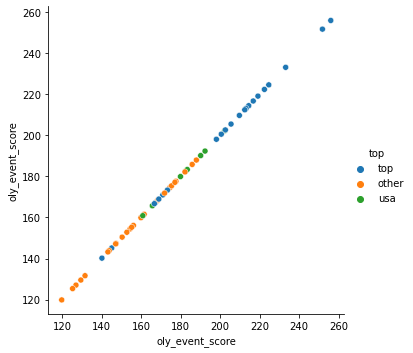

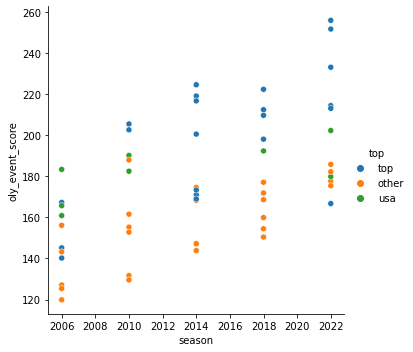

In [33]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.relplot(x=col, y='oly_event_score', data=train, hue='top')

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
 
# set colwidth hidher
pd.set_option('display.max_colwidth', 300)

In [35]:
#scores = train[['short_score', 'free_score']]

In [36]:
# scores.groupby(train.top).mean().plot.bar(stacked = True)
# plt.title(i)
# plt.show()


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/4234789631.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X1 = X_train.select_dtypes([np.int, np.float])
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/4234789631.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details 

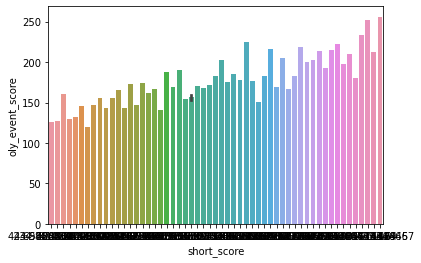

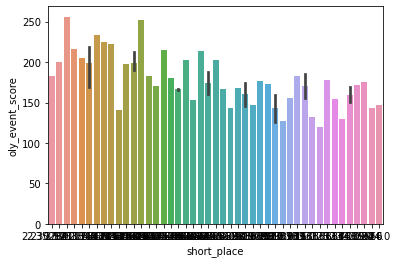

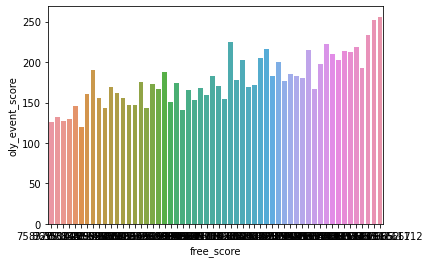

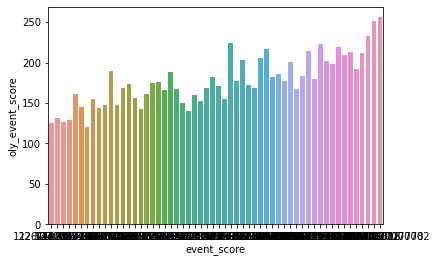

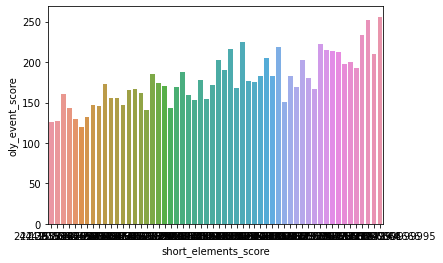

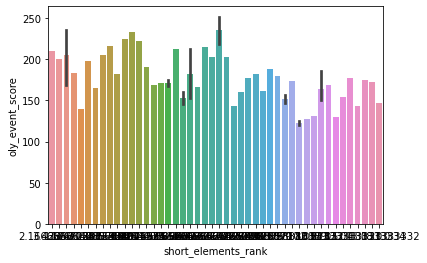

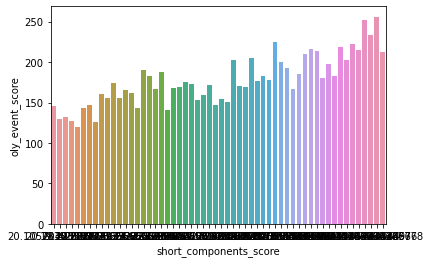

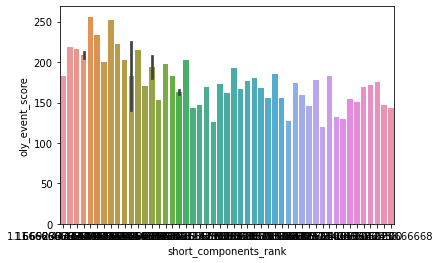

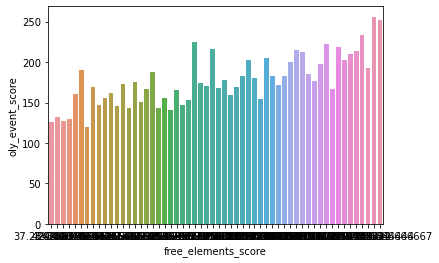

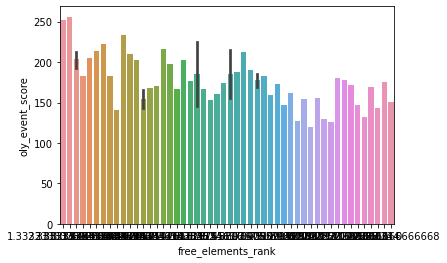

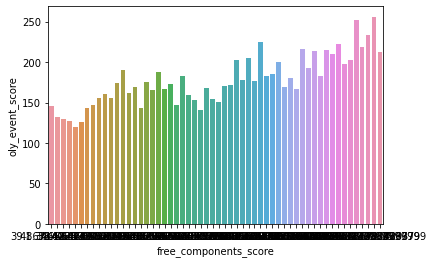

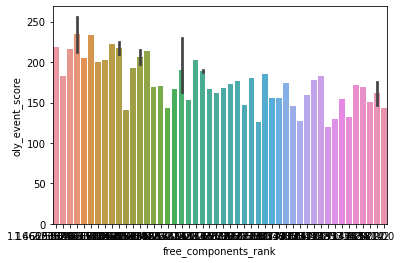

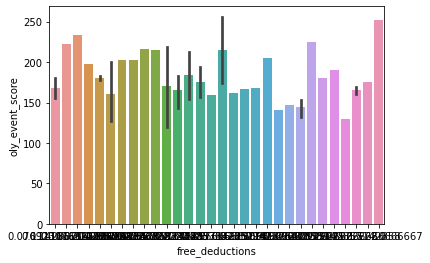

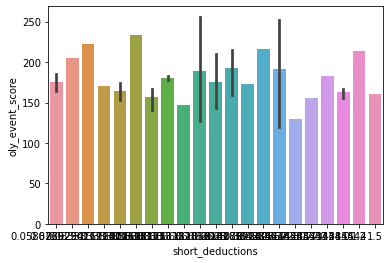

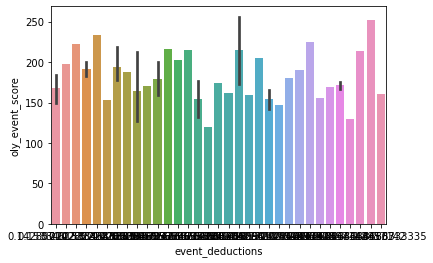

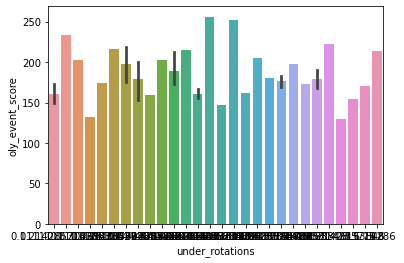

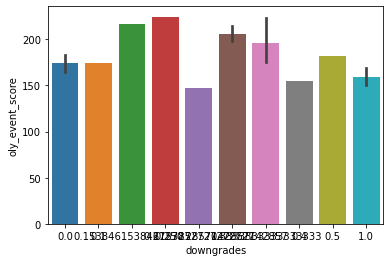

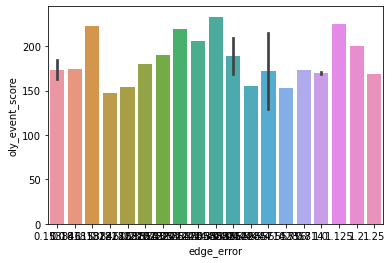

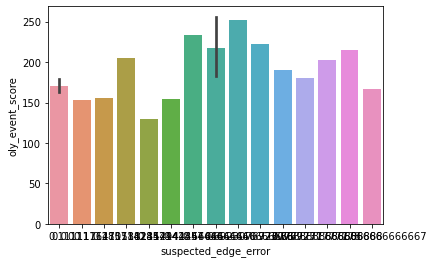

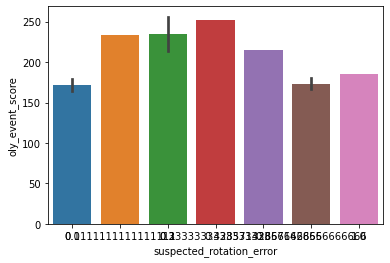

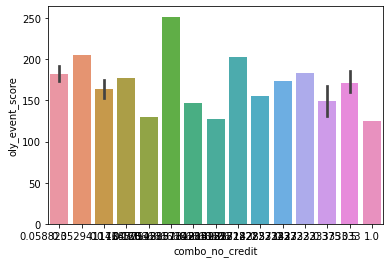

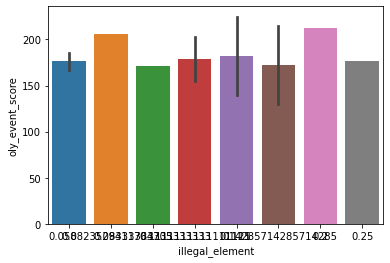

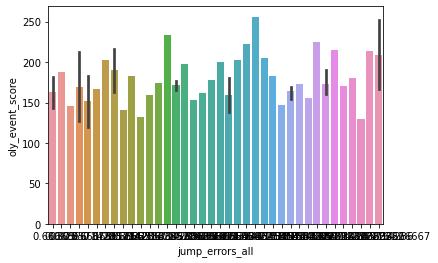

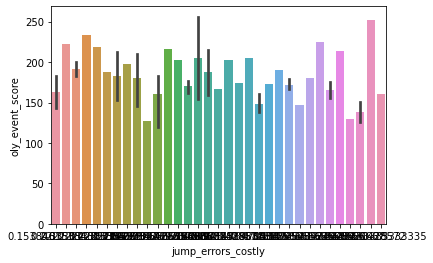

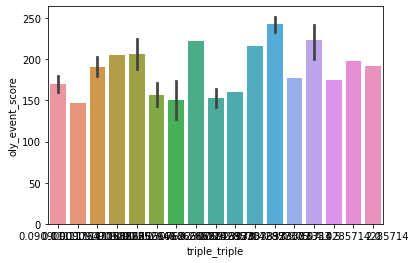

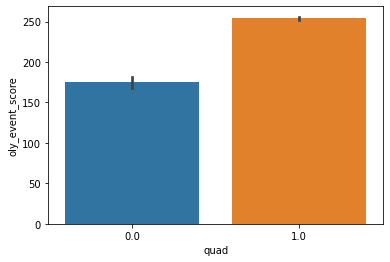

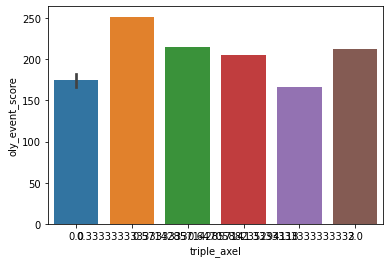

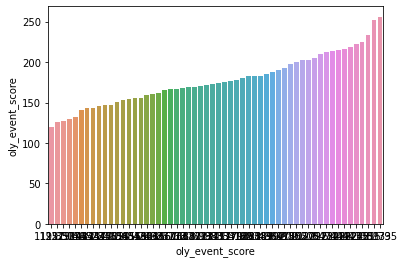

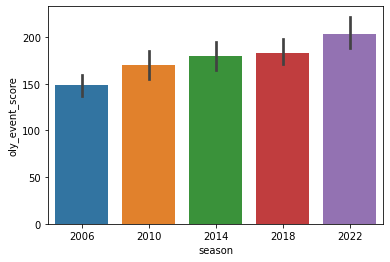

In [37]:
X1 = X_train.select_dtypes([np.int, np.float])
for i, col in enumerate(X1.columns):
    plt.figure(i)
    sns.barplot(x=col, y='oly_event_score', data=train)
    plt.show()

In [38]:
# X1 = X_train.select_dtypes([np.int, np.float])
# for i, col in enumerate(X1.columns):
#     plt.figure(i)
#     sns.lmplot(x=col, y='oly_event_score', data=train, hue='top')

In [39]:
train = train.reset_index()
validate = validate.reset_index()
test = test.reset_index()

In [40]:
train

,index,skater_name,short_score,short_place,free_score,event_score,short_elements_score,short_elements_rank,short_components_score,short_components_rank,free_elements_score,free_elements_rank,free_components_score,free_components_rank,free_deductions,short_deductions,event_deductions,under_rotations,downgrades,edge_error,suspected_edge_error,suspected_rotation_error,combo_no_credit,illegal_element,jump_errors_all,jump_errors_costly,triple_triple,quad,triple_axel,country,oly_event_final_place,oly_short_score,oly_short_elements_score,oly_short_components_score,oly_free_elements_score,oly_free_components_score,oly_free_score,oly_event_score,season,top
0,9,Kanako Murakami,57.075833,4.416667,109.609167,166.685000,29.343333,4.916667,27.815833,4.666667,53.643333,4.333333,56.299167,4.583333,0.333333,0.083333,0.416667,1.750000,0.333333,1.000000,0.000000,0.000000,0.000000,0.083333,3.583333,0.750000,0.166667,0.0,0.000000,japan,12.0,55.60,26.72,28.88,56.96,58.42,115.38,170.98,2014,top
1,2,Anastasia Gimazetdinova,44.886250,11.125000,72.533750,119.795000,24.707500,10.375000,20.428750,13.125000,33.286250,15.250000,39.622500,13.625000,0.375000,0.250000,0.625000,0.250000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,1.250000,1.000000,0.000000,0.0,0.000000,uzbekistan,23.0,49.02,27.94,21.08,41.47,42.16,82.63,131.65,2010,other
2,15,Yuna Kim,65.393333,3.000000,135.806667,201.200000,33.260000,6.000000,32.133333,1.666667,67.633333,2.000000,68.506667,1.000000,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.000000,0.0,0.000000,south_korea,2.0,74.92,39.03,35.89,69.69,74.50,144.19,219.11,2014,top
3,10,Kaori Sakamoto,72.156667,3.111111,141.921111,214.077778,38.000000,4.000000,34.267778,2.444444,72.274444,3.444444,69.757778,2.555556,0.111111,0.111111,0.222222,0.111111,0.000000,0.444444,0.444444,0.111111,0.000000,0.000000,1.333333,0.222222,0.333333,0.0,0.000000,japan,3.0,79.84,43.22,36.62,78.90,74.39,153.29,233.13,2022,top
4,19,Xiangning Li,56.576000,12.700000,110.394000,166.970000,30.591000,12.400000,26.943000,14.900000,56.192000,9.800000,53.556000,13.400000,0.400000,0.000000,0.400000,1.600000,0.400000,0.200000,0.400000,0.000000,0.000000,0.000000,3.000000,0.800000,0.000000,0.0,0.000000,china,22.0,52.46,27.27,26.19,50.56,51.41,101.97,154.43,2018,other
5,0,Adelina Sotnikova,60.201250,3.375000,111.102500,171.303750,31.597500,3.875000,28.853750,4.000000,53.170000,5.250000,59.057500,3.500000,1.125000,0.250000,1.375000,0.500000,0.250000,1.125000,0.000000,0.000000,0.000000,0.125000,3.375000,1.625000,0.125000,0.0,0.000000,russia,1.0,74.64,39.09,35.55,75.54,74.41,149.95,224.59,2014,top
6,19,Wakaba Higuchi,67.418571,4.428571,126.694286,194.112857,35.132857,5.857143,32.571429,4.142857,61.685714,6.000000,65.294286,4.142857,0.285714,0.285714,0.571429,0.571429,0.285714,0.571429,1.000000,0.428571,0.000000,0.142857,3.571429,0.857143,0.000000,0.0,0.571429,japan,5.0,73.51,39.53,33.98,72.67,69.26,140.93,214.44,2022,top
7,15,Mariah Bell,66.750000,6.111111,133.706667,200.456667,34.778889,6.777778,32.304444,6.111111,67.640000,5.111111,66.288889,5.222222,0.222222,0.333333,0.555556,0.444444,0.333333,0.000000,0.888889,0.000000,0.000000,0.111111,2.333333,0.888889,0.111111,0.0,0.000000,usa,10.0,65.38,33.43,32.95,68.25,68.67,136.92,202.30,2022,usa
8,9,Joannie Rochette,53.282500,4.500000,99.092500,155.331250,27.857500,5.000000,25.550000,5.000000,47.668750,5.375000,51.798750,4.750000,0.375000,0.125000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.875000,0.875000,0.250000,0.0,0.000000,canada,5.0,55.85,28.87,26.98,55.29,56.13,111.42,167.27,2006,top
9,12,Maé-Bérénice Méité,52.424000,7.500000,100.148000,152.572000,29.192000,5.000000,23.332000,10.100000,53.327000,5.800000,47.421000,9.800000,0.600000,0.100000,0.700000,0.300000,0.100000,0.100000,0.000000,0.000000,0.100000,0.000000,1.300000,0.900000,0.500000,0.0,0.000000,france,10.0,58.63,30.83,27.80,60.86,56.04,115.90,174.53,2014,other


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       56 non-null     int64  
 1   skater_name                 56 non-null     object 
 2   short_score                 56 non-null     float64
 3   short_place                 56 non-null     float64
 4   free_score                  56 non-null     float64
 5   event_score                 56 non-null     float64
 6   short_elements_score        56 non-null     float64
 7   short_elements_rank         56 non-null     float64
 8   short_components_score      56 non-null     float64
 9   short_components_rank       56 non-null     float64
 10  free_elements_score         56 non-null     float64
 11  free_elements_rank          56 non-null     float64
 12  free_components_score       56 non-null     float64
 13  free_components_rank        56 non-nu

In [42]:
X_train = train.drop(columns=['index', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'top', 'country'])
# creates dataframe that drops all column except the selected features for modeling
y_train = train[['oly_event_score']]
# creates dataframe of target variable (y) only

X_validate = validate.drop(columns=['index','skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score','country'])
y_validate = validate[['oly_event_score']]
# repeat above for validate set

X_test = test.drop(columns=['index', 'skater_name','oly_event_final_place', 'oly_short_score', 'oly_short_elements_score',
                             'oly_short_components_score', 'oly_free_elements_score', 'oly_free_components_score',
                             'oly_free_score', 'oly_event_score', 'country'])
y_test = test[['oly_event_score']]

In [43]:
scaler = sklearn.preprocessing.StandardScaler()
# employs the min max scaler
scaler.fit(X_train)
# inserts the 4 selected features into the scaler

X_train = data=scaler.transform(X_train)
X_validate = data=scaler.transform(X_validate)
X_test = data=scaler.transform(X_test)

In [44]:
X_train = pd.DataFrame(X_train)
X_validate = pd.DataFrame(X_validate)
X_test = pd.DataFrame(X_test)

In [45]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.097535,-0.637781,0.000678,-0.061171,-0.295650,-0.567438,0.127188,-0.632596,-0.089931,-0.609897,0.114648,-0.581637,-0.450021,-0.437048,-0.591303,2.398553,1.041956,2.225964,-0.507165,-0.337099,-0.513877,0.998915,1.272509,-0.322732,0.035551,-0.192450,-0.262005,-0.037740
1,-1.482186,0.747996,-1.844145,-1.742140,-1.247239,0.741638,-1.652563,0.922304,-1.818621,1.686511,-1.750099,1.166823,-0.361936,0.079850,-0.243110,-0.510099,-0.483283,-0.611650,-0.507165,-0.337099,1.486383,-0.455353,-0.561934,0.040022,-0.534620,-0.192450,-0.262005,-0.742212
2,0.847275,-0.930429,1.304231,1.176164,0.508317,-0.307621,1.167393,-1.184088,1.098077,-1.100733,1.479663,-1.274575,-0.450021,-0.695497,-0.730580,-0.348507,-0.483283,0.334221,-0.507165,-0.337099,-0.513877,-0.455353,-0.758482,-0.927321,-0.534620,-0.192450,-0.262005,-0.037740
3,1.615542,-0.907476,1.608478,1.637822,1.481288,-0.787283,1.681639,-1.041108,1.492193,-0.796882,1.619560,-0.973765,-0.919808,-0.350898,-0.916283,-0.779419,-0.483283,0.649512,0.793987,0.244515,-0.513877,-0.455353,-0.496418,-1.088545,0.605723,-0.192450,-0.262005,1.371205
4,-0.154312,1.073352,0.039731,-0.050954,-0.039544,1.227296,-0.083101,1.248603,0.126498,0.540060,-0.192087,1.123313,-0.309085,-0.695497,-0.619158,2.107688,1.347004,-0.044127,0.663872,-0.337099,-0.513877,-0.455353,0.813898,-0.250181,-0.534620,-0.192450,-0.262005,0.666733
5,0.257491,-0.852963,0.074985,0.104408,0.167058,-0.817262,0.377251,-0.755150,-0.130126,-0.417069,0.423079,-0.791130,1.223593,0.079850,1.010384,-0.025324,0.660646,2.580665,-0.507165,-0.337099,-0.513877,1.726049,1.108719,0.946906,-0.106992,-0.192450,-0.262005,-0.037740
6,1.077328,-0.635321,0.850811,0.922096,0.892755,-0.341883,1.272942,-0.728888,0.593015,-0.259301,1.120462,-0.666816,-0.550690,0.190614,-0.332645,0.113183,0.824065,1.009844,2.420426,1.906271,-0.513877,2.037677,1.263150,-0.167266,-0.534620,-0.192450,1.454250,1.371205
7,1.001383,-0.287750,1.199738,1.149516,0.820096,-0.121086,1.208618,-0.367063,1.098643,-0.446286,1.231676,-0.458090,-0.684914,0.338299,-0.359174,-0.133052,1.041956,-0.611650,2.095138,-0.337099,-0.513877,1.483671,0.289771,-0.121202,-0.154506,-0.192450,-0.262005,1.371205
8,-0.528431,-0.620566,-0.522617,-0.468194,-0.600644,-0.547452,-0.418713,-0.571319,-0.597283,-0.390774,-0.388578,-0.549408,-0.361936,-0.307824,-0.452026,-0.994875,-0.483283,-0.611650,-0.507165,-0.337099,1.486383,-0.455353,-0.856756,-0.141355,0.320637,-0.192450,-0.262005,-1.446684
9,-0.625950,-0.000840,-0.470097,-0.567110,-0.326714,-0.547452,-0.953090,0.366217,-0.116793,-0.301372,-0.878088,0.427152,0.113723,-0.385358,-0.117761,-0.413144,-0.025711,-0.327888,-0.507165,-0.337099,0.019526,-0.455353,-0.522625,-0.105079,1.175894,-0.192450,-0.262005,-0.037740


In [46]:
train.oly_event_score.mean()

177.58946428571423

In [47]:
y_train['pred_mean'] = y_train.oly_event_score.mean()
y_validate['pred_mean'] = y_validate.oly_event_score.mean()
# calculates mean prior to computing rmse

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_mean)**(1/2)
# computes baseline RMSE for train and validate sets (square root of MSE)

print("Baseline RMSE\nTrain/In-Sample: ", round(rmse_train, 2)), 
print("Baseline RMSE\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

Baseline RMSE
Train/In-Sample:  31.26
Baseline RMSE
Validate/Out-of-Sample:  29.03


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/1930022914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['pred_mean'] = y_train.oly_event_score.mean()
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/1930022914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['pred_mean'] = y_validate.oly_event_score.mean()


In [48]:
lm = LinearRegression(normalize=True)
# create the model

lm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['value_predict_lm'] = lm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_predict_lm)**(1/2)
# computes model rmse

y_validate['value_predict_lm'] = lm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_predict_lm)**(1/2)
# comutes predictions and rmse with validate data

print("**OLS Linear Regression Performance**")
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for OLS using LinearRegression\nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**OLS Linear Regression Performance**
---------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  10.37
---------------------------------------
RMSE for OLS using LinearRegression
Validation/Out-of-Sample:  20.63


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/542473638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['value_predict_lm'] = lm.predict(X_train)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/542473638.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['value_predict_lm'] = lm.predict(X_validate)


In [59]:
lars = LassoLars(alpha=1)
# creates the model

lars.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_lars'] = lars.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_lars)**(1/2)
# computes model rmse

y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_lars)**(1/2)
# comutes predictions and rmse with validate data

print("**LARS Performance**")
print("---------------------------------------")
print("RMSE for Lars\nTraining/In-Sample: ", round(rmse_train, 2))
print("---------------------------------------")
print("RMSE for Lars\nOut-of-Sample: ", round(rmse_validate, 2))

**LARS Performance**
---------------------------------------
RMSE for Lars
Training/In-Sample:  17.25
---------------------------------------
RMSE for Lars
Out-of-Sample:  18.12


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/2626484696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['pred_lars'] = lars.predict(X_train)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/2626484696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['pred_lars'] = lars.predict(X_validate)


In [88]:
glm = TweedieRegressor(power= 2, alpha=3)
# creates the model

glm.fit(X_train, y_train.oly_event_score)
# fit the model to scaled training data

y_train['pred_value_glm'] = glm.predict(X_train)
# computes model predictions
rmse_train = mean_squared_error(y_train.oly_event_score, y_train.pred_value_glm)**(1/2)
# computes model rmse

y_validate['pred_value_glm'] = glm.predict(X_validate)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.pred_value_glm)**(1/2)
# comutes predictions and rmse with validate data

print("**Generalized Linear Model Performance**")
print("---------------------------------------")
print("RMSE for GLM /In-Sample: ", round(rmse_train, 2)), 
print("---------------------------------------")
print("RMSE for GLM \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**Generalized Linear Model Performance**
---------------------------------------
RMSE for GLM /In-Sample:  15.95
---------------------------------------
RMSE for GLM 
Validation/Out-of-Sample:  17.67


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/3898545806.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['pred_value_glm'] = glm.predict(X_train)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/3898545806.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['pred_value_glm'] = glm.predict(X_validate)


In [51]:
pf = PolynomialFeatures(degree=2)
# creates polynomial features to use in model with degree of 3

X_train_degree3 = pf.fit_transform(X_train)
# fit and transform X_train_scaled

X_validate_degree3 = pf.transform(X_validate)


In [52]:
lm3 = LinearRegression(normalize=True)
# creates linear regression model prior to fitting with new polynomial features

lm3.fit(X_train_degree3, y_train.oly_event_score)
# fit and transform polynomial features and target

y_train['value_pred_lm3'] = lm3.predict(X_train_degree3)
# predictions calculated on train

rmse_train = mean_squared_error(y_train.oly_event_score, y_train.value_pred_lm3)**(1/2)
# computes rmse with train

y_validate['value_pred_lm3'] = lm3.predict(X_validate_degree3)
rmse_validate = mean_squared_error(y_validate.oly_event_score, y_validate.value_pred_lm3)**(1/2)
# computes predictions/rmse with validate

print("**Polynomial Regression Model Performance**")
print("---------------------------------------")
print("RMSE for Polynomial Model \nTraining/In-Sample: ", round(rmse_train, 2)),
print("---------------------------------------")
print("RMSE for Polynomial Model, \nValidation/Out-of-Sample: ", round(rmse_validate, 2))

**Polynomial Regression Model Performance**
---------------------------------------
RMSE for Polynomial Model 
Training/In-Sample:  0.0
---------------------------------------
RMSE for Polynomial Model, 
Validation/Out-of-Sample:  34.91


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/1248090611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['value_pred_lm3'] = lm3.predict(X_train_degree3)
/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/1248090611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate['value_pred_lm3'] = lm3.predict(X_validate_degree3)


In [89]:
y_test['pred_value_glm'] = glm.predict(X_test)
rmse_test = mean_squared_error(y_test.oly_event_score, y_test.pred_value_glm)**(1/2)

print("**Generalized Linear Model Performance on Test Data**")
print("---------------------------------------")
print("RMSE : Test Data \nTesting/Out-of-Sample: ", round(rmse_test, 2))

**Generalized Linear Model Performance on Test Data**
---------------------------------------
RMSE : Test Data 
Testing/Out-of-Sample:  16.53


/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_35972/2952927879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred_value_glm'] = glm.predict(X_test)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.706528,-1.314069,0.668552,0.826225,0.623267,-1.335467,0.733953,-1.280380,0.552133,-1.281039,0.732774,-1.274575,-1.154701,-0.695497,-1.287688,-0.994875,-0.483283,-0.611650,-0.507165,-0.337099,-0.513877,2.037677,-1.432359,-1.410993,-0.045902,-0.192450,-0.262005,-1.446684
1,0.379055,-0.192660,0.445918,0.410016,0.243521,-0.273360,0.588364,-0.334966,0.321276,-0.229250,0.600350,-0.307685,0.053322,0.633669,0.383637,2.052285,1.477738,0.604470,-0.088937,-0.337099,-0.513877,2.037677,1.375462,0.661885,0.442816,-0.192450,-0.262005,0.666733
2,3.165897,-1.343580,3.656987,3.602976,3.740263,-1.506775,2.291721,-1.306641,4.490708,-1.311091,2.262201,-1.274575,-1.154701,-0.695497,-1.287688,-0.994875,-0.483283,-0.611650,-0.507165,-0.337099,-0.513877,-0.455353,-1.544672,-1.410993,-0.534620,5.196152,5.744888,1.371205
3,-0.669260,-0.029009,-0.917961,-0.839017,-0.638572,0.259252,-0.615398,-0.287217,-1.025860,0.314403,-0.703765,-0.096727,-0.193774,0.432281,0.079760,0.239099,-0.483283,0.420210,-0.241020,-0.337099,-0.028965,1.131121,0.099180,-0.091888,-0.534620,-0.192450,-0.262005,-0.742212
4,-0.289488,0.722174,0.234088,0.046413,-0.152647,0.651702,-0.467862,1.340519,0.605268,-0.091014,-0.313521,0.929935,-1.154701,-0.695497,-1.287688,2.107688,1.347004,-0.611650,-0.507165,-0.337099,-0.513877,-0.455353,0.027708,-0.830587,-0.534620,-0.192450,-0.262005,0.666733
5,-0.537802,-0.749676,-1.045021,-0.834976,-0.704818,-0.637388,-0.316319,-0.709192,-1.394985,-0.022648,-0.540091,-0.597752,-0.890446,-0.307824,-0.869857,-0.994875,-0.483283,-0.611650,-0.507165,-0.337099,1.486383,-0.455353,-1.053303,-0.504108,0.320637,-0.192450,-0.262005,-1.446684
6,-0.243028,-0.852963,-0.578036,-0.402186,-0.509300,-0.697346,0.139636,-1.099832,-0.874435,-0.443364,-0.162147,-0.936164,-0.626191,0.467524,-0.243110,-0.994875,-0.483283,-0.611650,-0.507165,-0.337099,1.486383,-0.455353,-0.758482,0.040022,-0.534620,-0.192450,-0.262005,-1.446684
7,-0.618169,0.825461,-0.686323,-0.720437,-0.026407,-0.067790,-1.313156,1.083156,-0.185959,-0.048943,-1.256144,1.190996,0.430828,-0.695497,-0.034194,0.459452,0.660646,2.225964,-0.507165,-0.337099,-0.513877,-0.455353,0.617351,0.040022,2.031151,-0.192450,-0.262005,-0.037740
8,0.324823,0.226393,-0.173037,-0.053033,0.453305,0.076108,0.172041,0.458132,-0.278393,0.792489,0.024616,0.620530,0.536530,-0.075219,0.383637,0.168586,0.431860,-0.044127,-0.507165,-0.337099,-0.513877,-0.455353,0.027708,0.330225,0.833791,-0.192450,-0.262005,1.371205
9,-2.711972,0.722174,-2.050830,-2.364302,-3.219353,0.891533,-2.006425,0.347834,-2.045035,0.371773,-1.958360,0.272449,-1.154701,-0.695497,-1.287688,-0.994875,-0.483283,-0.611650,-0.507165,-0.337099,-0.513877,-0.455353,-1.544672,-1.410993,-0.534620,-0.192450,-0.262005,-1.446684


In [53]:
### distributions of features

# sns.kdeplot(train.free_score_mean[train.top == "top"],label='top');
# sns.kdeplot(train.free_score_mean[train.top == "usa"],label='usa');
# sns.kdeplot(train.free_score_mean[train.top == "other"],label='other');


for prepare

df['event_score'] = df.event_score.astype(float)
df['triple_triple'] = df.apply(lambda x: x.str.contains("3S+3") | x.str.contains("3T+3") | x.str.contains("3Lo+3") | x.str.contains("3F+3") | x.str.contains("3Lz+3"), axis=1).sum(axis=1)
df['quad'] = df.apply(lambda x: x.str.contains("4S") | x.str.contains("4T") | x.str.contains("4Lo") | x.str.contains("4F") | x.str.contains("4Lz"), axis=1).sum(axis=1)
df['triple_axel'] = df.apply(lambda x: x.str.contains("3A"), axis=1).sum(axis=1)
df = df.drop(columns=['last_name', 'country_flag', 'short_best', 'olympian', 'free_best', 'event_best', 'first_name', 'short_combo_jump', 'short_solo_jump', 'short_axel_jump', 'free_elements'])
df['season'] = df.season.astype('object')
df2006 = pd.DataFrame(df[(df.season <= 2006)].where(df.event != 'olympics'))
o2006 = pd.DataFrame(df[df.season == 2006].where(df.event == 'olympics'))
df2010 = pd.DataFrame(df[(df.season <= 2010) & (df.season > 2006)].where(df.event != 'olympics'))
o2010 = pd.DataFrame(df[df.season == 2010].where(df.event == 'olympics'))
df2014 = pd.DataFrame(df[(df.season <= 2014) & (df.season > 2010)].where(df.event != 'olympics'))
o2014 = pd.DataFrame(df[df.season == 2014].where(df.event == 'olympics'))
df2018 = pd.DataFrame(df[(df.season <= 2018) & (df.season > 2014)].where(df.event != 'olympics'))
o2018 = pd.DataFrame(df[df.season == 2018].where(df.event == 'olympics'))
df2022 = pd.DataFrame(df[(df.season <= 2022) & (df.season > 2018)].where(df.event != 'olympics'))
o2022 = pd.DataFrame(df[df.season == 2022].where(df.event == 'olympics'))
df2006 = df2006.dropna()
o2006 = o2006.dropna()
df2010 = df2010.dropna()
o2010 = o2010.dropna()
df2014 = df2014.dropna()
o2014 = o2014.dropna()
df2018 = df2018.dropna()
o2018 = o2018.dropna()
df2022 = df2022.dropna()
o2022 = o2022.dropna()
o2006 = o2006[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2010 = o2010[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2014 = o2014[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2018 = o2018[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2022 = o2022[['skater_name', 'country', 'event_final_place', 'short_score', 'short_elements_score', 'short_components_score', 'free_elements_score', 'free_components_score', 'free_score', 'event_score', 'season']]
o2006 = o2006.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2010 = o2010.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2014 = o2014.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2018 = o2018.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
o2022 = o2022.rename(columns={'event_final_place': 'oly_event_final_place', 'short_score': 'oly_short_score', 'short_elements_score': 'oly_short_elements_score', 'short_components_score': 'oly_short_components_score', 'free_elements_score': 'oly_free_elements_score', 'free_components_score': 'oly_free_components_score', 'free_score': 'oly_free_score', 'event_score':'oly_event_score'})
df2006 = df2006.groupby(df2006.skater_name).mean()
df2010 = df2010.groupby(df2010.skater_name).mean()
df2014 = df2014.groupby(df2014.skater_name).mean()
df2018 = df2018.groupby(df2018.skater_name).mean()
df2022 = df2022.groupby(df2022.skater_name).mean()
df06 = df2006.merge(o2006, on='skater_name')
df10 = df2010.merge(o2010, on='skater_name')
df14 = df2014.merge(o2014, on='skater_name')
df18 = df2018.merge(o2018, on='skater_name')
df22 = df2022.merge(o2022, on='skater_name')
df = pd.concat([df06, df10, df14, df18, df22], axis=0)
df['season'] = df.season.astype(int)

